# 🍕 **Pizza Sales Analysis - Data Cleaning and Visualization**

# Importing orders table

In [3]:
import pandas as pd

df1 = pd.read_csv('orders.csv')
df1.head()


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


# Checking null, duplicates and data types of 'orders' table

In [4]:
print(df1.isnull().sum())
print("Duplicates :",df1.duplicated().sum())
print(df1.dtypes)

order_id    0
date        0
time        0
dtype: int64
Duplicates : 0
order_id     int64
date        object
time        object
dtype: object


# Ensure date and time is in datetime format

In [5]:
df1['date'] = pd.to_datetime(df1['date'])
df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S', errors='coerce')
print(df1.dtypes)

order_id             int64
date        datetime64[ns]
time        datetime64[ns]
dtype: object


# Importing order_details table

In [6]:
df2 = pd.read_csv('order_details.csv')
df2.head()


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


# Checking null, duplicates and data types of 'order_details' table

In [7]:
print(df2.isnull().sum())
print("Duplicates :",df2.duplicated().sum())
print(df2.dtypes)

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64
Duplicates : 0
order_details_id     int64
order_id             int64
pizza_id            object
quantity             int64
dtype: object


# Importing 'pizza_types' table

In [20]:
df3 = pd.read_csv('pizza_types.csv', encoding='latin1')
df3.head()


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


# Checking null, duplicates and data types of 'pizza_types' table

In [24]:
print(df3.isnull().sum())
print("Duplicates :",df3.duplicated().sum())
print(df3.dtypes)

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64
Duplicates : 0
pizza_type_id    object
name             object
category         object
ingredients      object
dtype: object


# Importing 'pizzas' table

In [22]:
df4 = pd.read_csv('pizzas.csv', encoding='latin1')
df4.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


# Checking null, duplicates and data types of 'pizzas' table

In [25]:
print(df4.isnull().sum())
print("Duplicates :",df4.duplicated().sum())
print(df4.dtypes)

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64
Duplicates : 0
pizza_id          object
pizza_type_id     object
size              object
price            float64
dtype: object


# Merging all 4 tables


In [10]:
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')
pizza_types = pd.read_csv('pizza_types.csv', encoding='latin1')

# Step-by-step merging
df = pd.merge(order_details, pizzas, on='pizza_id', how='left')
df = pd.merge(df, pizza_types, on='pizza_type_id', how='left')
df = pd.merge(df, orders, on='order_id', how='left')

# Final result
df.head()


,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


# Save and Download the merged file


In [11]:
df.to_csv('merged_table.csv', index=False)

from google.colab import files
files.download('merged_table.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Pie chart of pizza size by quantity

size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64


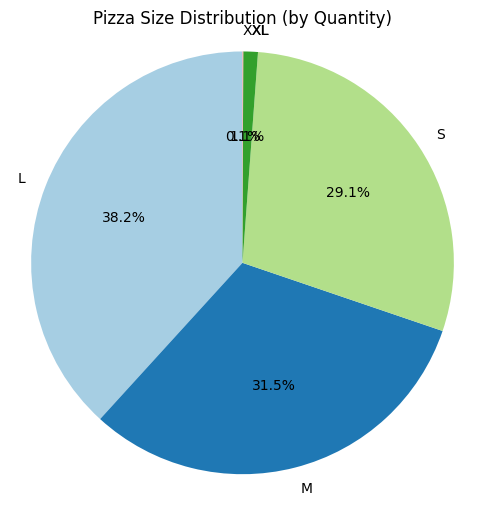

In [12]:
import matplotlib.pyplot as plt

# Group by size and sum the quantity
size_counts = df.groupby('size')['quantity'].sum()
print (size_counts)

# Plot
plt.figure(figsize=(6, 6))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pizza Size Distribution (by Quantity)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


#  Pie chart of pizza category by quantity

category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64


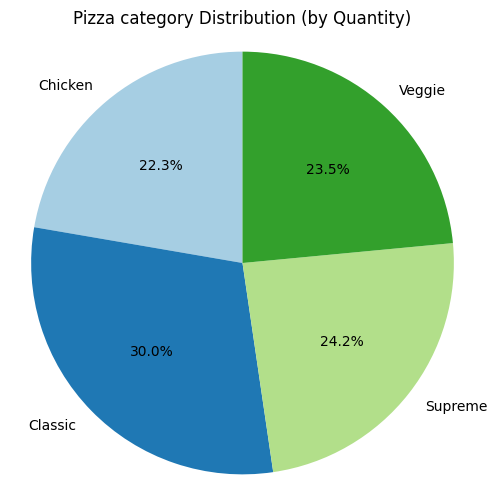

In [13]:
# Group by category and sum the quantity
category_counts = df.groupby('category')['quantity'].sum()
print (category_counts)

# Plot
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pizza category Distribution (by Quantity)')
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()

# Clustered bar graph of pizza sale by category and size

size           L       M       S     XL   XXL
category                                     
Chicken   4932.0  3894.0  2224.0    NaN   NaN
Classic   4057.0  4112.0  6139.0  552.0  28.0
Supreme   4564.0  4046.0  3377.0    NaN   NaN
Veggie    5403.0  3583.0  2663.0    NaN   NaN


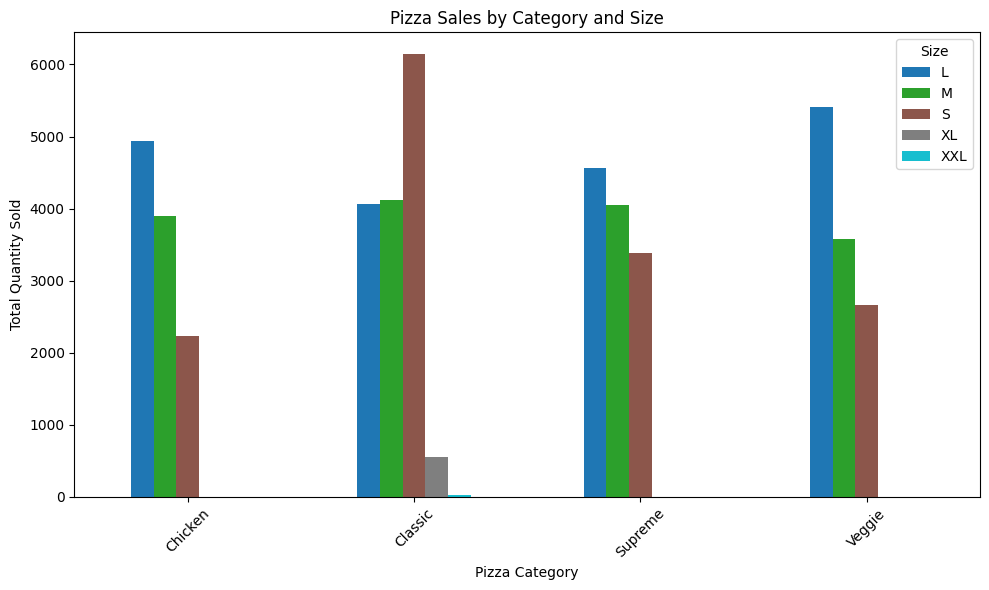

In [14]:
# Group by category and size, summing quantity
grouped = df.groupby(['category', 'size'])['quantity'].sum().unstack()
print(grouped)

# Plot the grouped data as clustered bar chart
grouped.plot(kind='bar', figsize=(10, 6), colormap='tab10')

plt.title('Pizza Sales by Category and Size')
plt.xlabel('Pizza Category')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Clustered bar graph of pizza revenue by category and size

size             L         M         S       XL     XXL
category                                               
Chicken   102339.0  65224.50  28356.00      NaN     NaN
Classic    74518.5  60581.75  69870.25  14076.0  1006.6
Supreme    94258.5  66475.00  47463.50      NaN     NaN
Veggie    104202.7  57101.00  32386.75      NaN     NaN


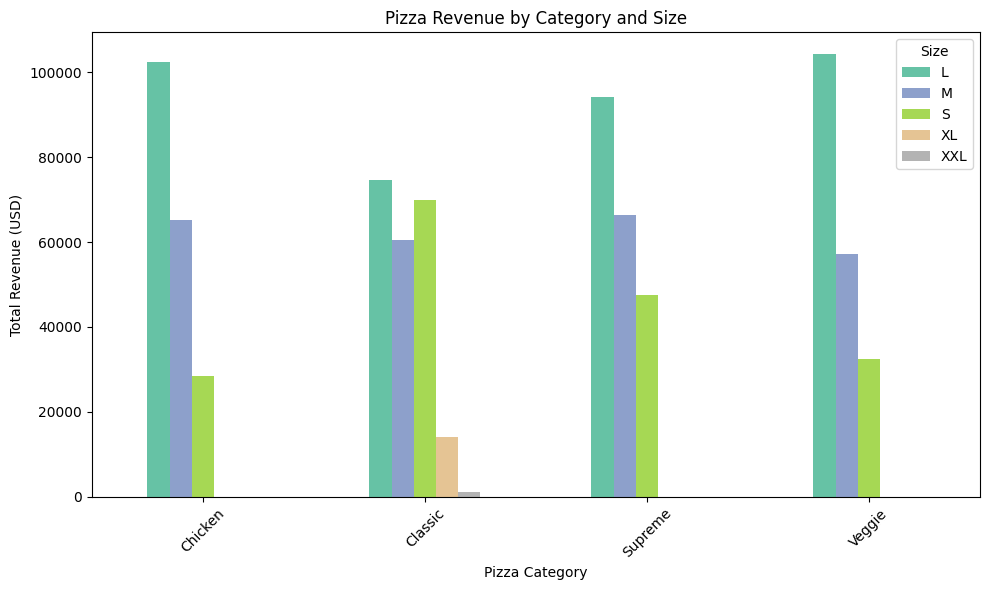

In [15]:
df['revenue'] = df['quantity'] * df['price']

# Group by category and size, summing revenue
revenue_grouped = df.groupby(['category', 'size'])['revenue'].sum().unstack()
print(revenue_grouped)

# Plot
revenue_grouped.plot(kind='bar', figsize=(10, 6), colormap='Set2')

plt.title('Pizza Revenue by Category and Size')
plt.xlabel('Pizza Category')
plt.ylabel('Total Revenue (USD)')
plt.legend(title='Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line chart of total quantity sold per month

month
2015-01    4232
2015-02    3961
2015-03    4261
2015-04    4151
2015-05    4328
2015-06    4107
2015-07    4392
2015-08    4168
2015-09    3890
2015-10    3883
2015-11    4266
2015-12    3935
Name: quantity, dtype: int64


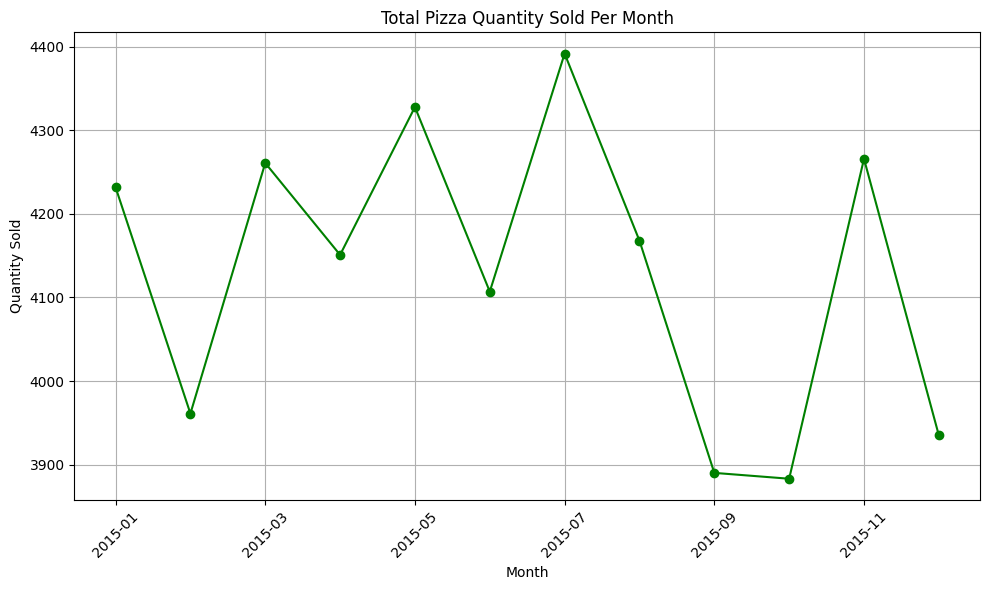

In [19]:
# Step 1: Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 2: Create a 'month' column in YYYY-MM format
df['month'] = df['date'].dt.to_period('M').astype(str)

# Step 3: Group by month and sum quantity
monthly_quantity = df.groupby('month')['quantity'].sum()
print(monthly_quantity)

# Step 4: Plot the line chart
plt.figure(figsize=(10, 6))
monthly_quantity.plot(kind='line', marker='o', color='green')

plt.title('Total Pizza Quantity Sold Per Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Line chart of total quantity sold by hour of the day

hour
9        4
10      18
11    2728
12    6776
13    6413
14    3613
15    3216
16    4239
17    5211
18    5417
19    4406
20    3534
21    2545
22    1386
23      68
Name: quantity, dtype: int64


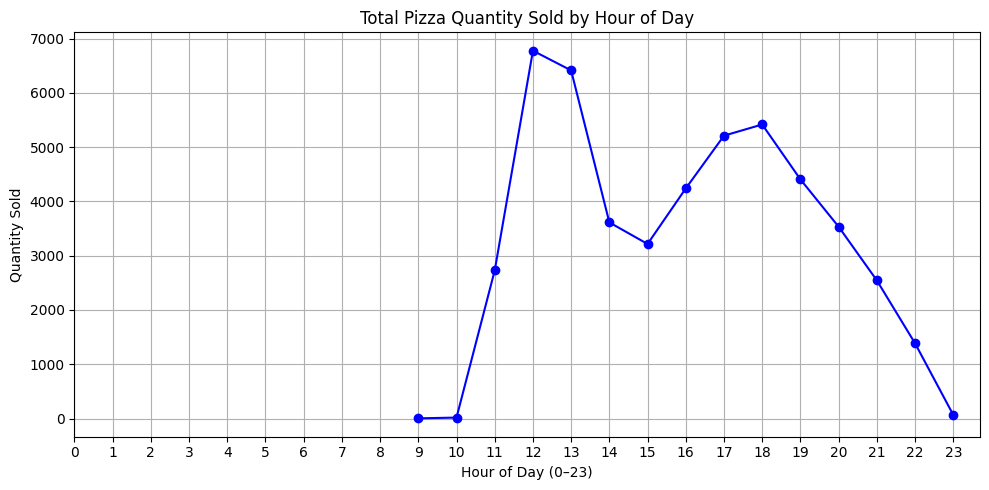

In [17]:


# Step 1: Extract the hour from 'time'
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Step 2: Group by hour and sum quantity
hourly_quantity = df.groupby('hour')['quantity'].sum()
print(hourly_quantity)

# Step 3: Plot the line chart
plt.figure(figsize=(10, 5))
hourly_quantity.plot(kind='line', marker='o', color='blue')

plt.title('Total Pizza Quantity Sold by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Quantity Sold')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Line chart of total quantity sold by day of the week


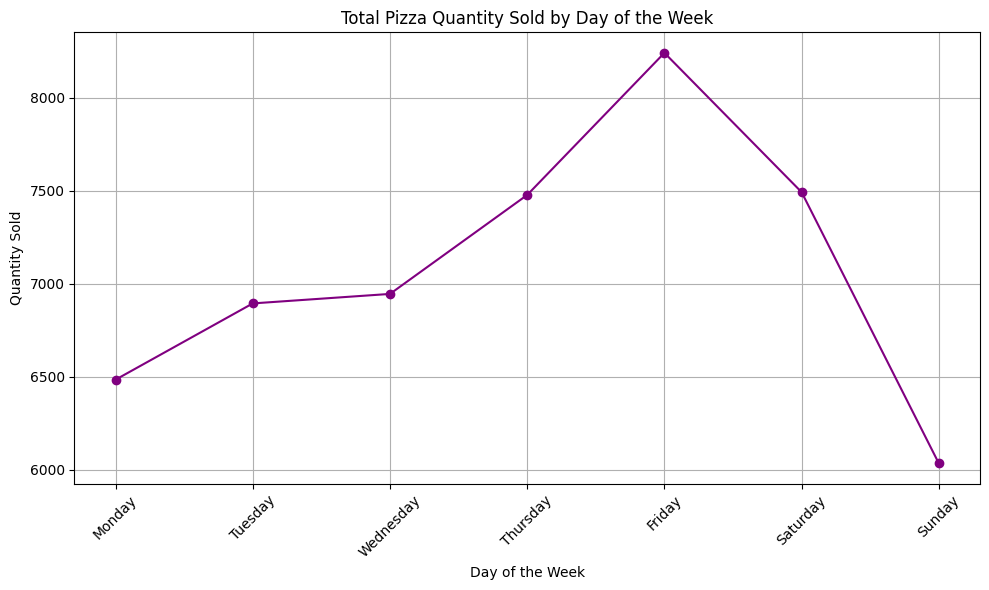

In [18]:
# Step 1: Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Step 2: Extract the day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['date'].dt.day_name()  # e.g., "Monday", "Tuesday", etc.

# Step 3: Group by day of the week and sum the quantity
daily_quantity = df.groupby('day_of_week')['quantity'].sum()

# Step 4: Reorder the days of the week (to start from Monday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_quantity = daily_quantity[ordered_days]

# Step 5: Plot the line chart
plt.figure(figsize=(10, 6))
daily_quantity.plot(kind='line', marker='o', color='purple')

plt.title('Total Pizza Quantity Sold by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()